In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("dataset.csv")

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11,2,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,11,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(85709, 785)

In [5]:
df['label'].unique()

array([11, 12, 13, 10,  1,  0,  4,  7,  3,  5,  8,  9,  2,  6],
      dtype=int64)

In [6]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [7]:
y = df["label"]
X = df.drop(labels = ["label"], axis = 1)

In [8]:
y

0        11
1        11
2        11
3        11
4        11
         ..
85704    12
85705    12
85706    12
85707    12
85708    12
Name: label, Length: 85709, dtype: int64

In [9]:
X = X.values.reshape(-1,28,28,1)

In [10]:
X.shape

(85709, 28, 28, 1)

In [11]:
import matplotlib.pyplot as plt

In [12]:
dic={0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8,9:9,10:'/',11:'+',12:'-',13:'*'}

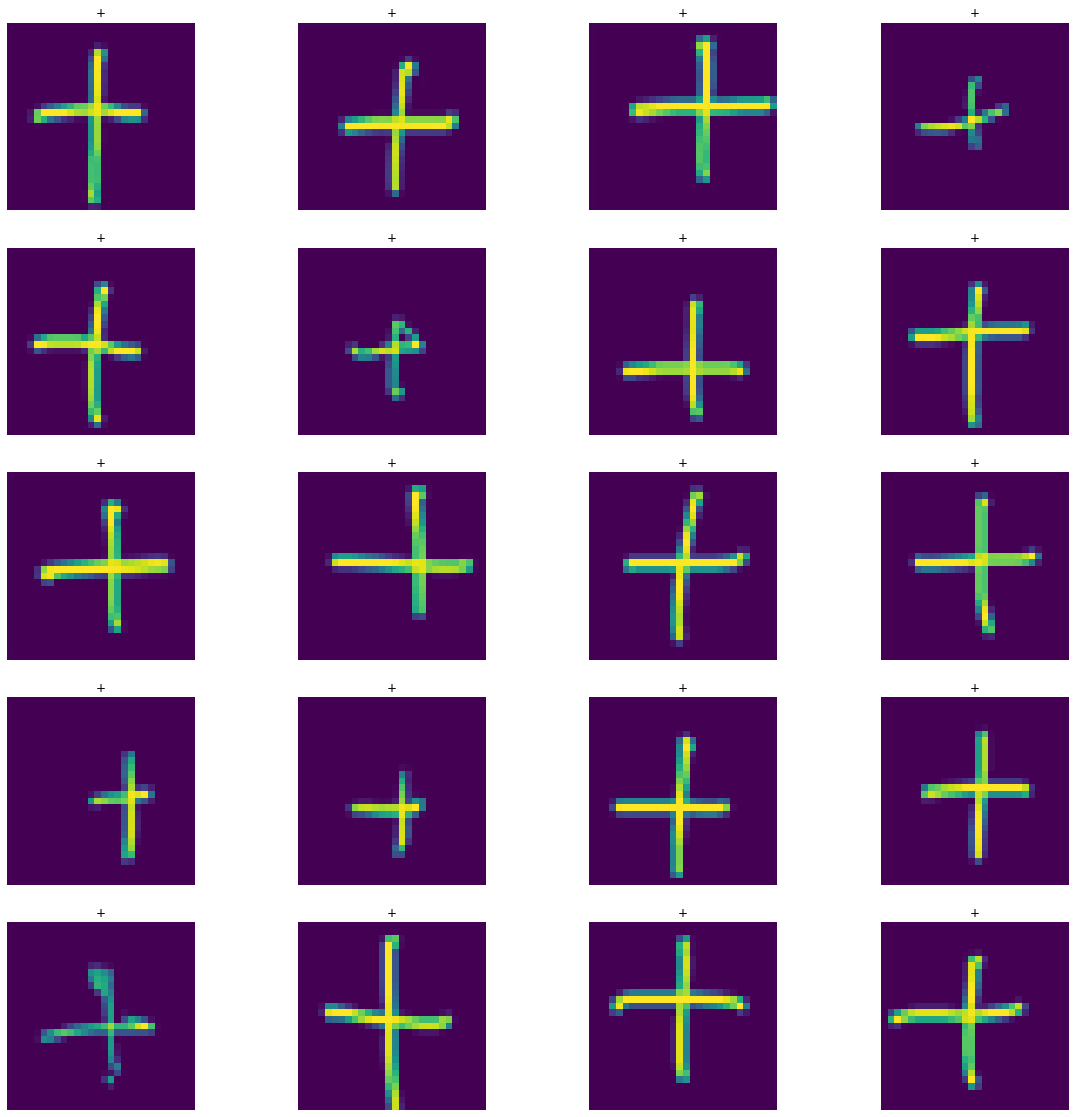

In [13]:
def plot_image(x,y, index):
    image = plt.imshow(x[index])
    l=plt.title(dic[y[index]])
    ax.grid(False)
    ax.axis('off')    
    return image, l
fig = plt.figure(figsize=(20, 20))

for i in range(20):
    ax = fig.add_subplot(5, 4, i + 1)
    plot_image(X,y, i)

plt.show()

In [14]:
from sklearn.utils import shuffle
X_shuffled, y_shuffled = shuffle(X, y)

In [15]:
y_shuffled.reset_index(drop=True, inplace=True)
y_shuffled

0        12
1        11
2        12
3         6
4        12
         ..
85704    12
85705    11
85706     9
85707    11
85708     5
Name: label, Length: 85709, dtype: int64

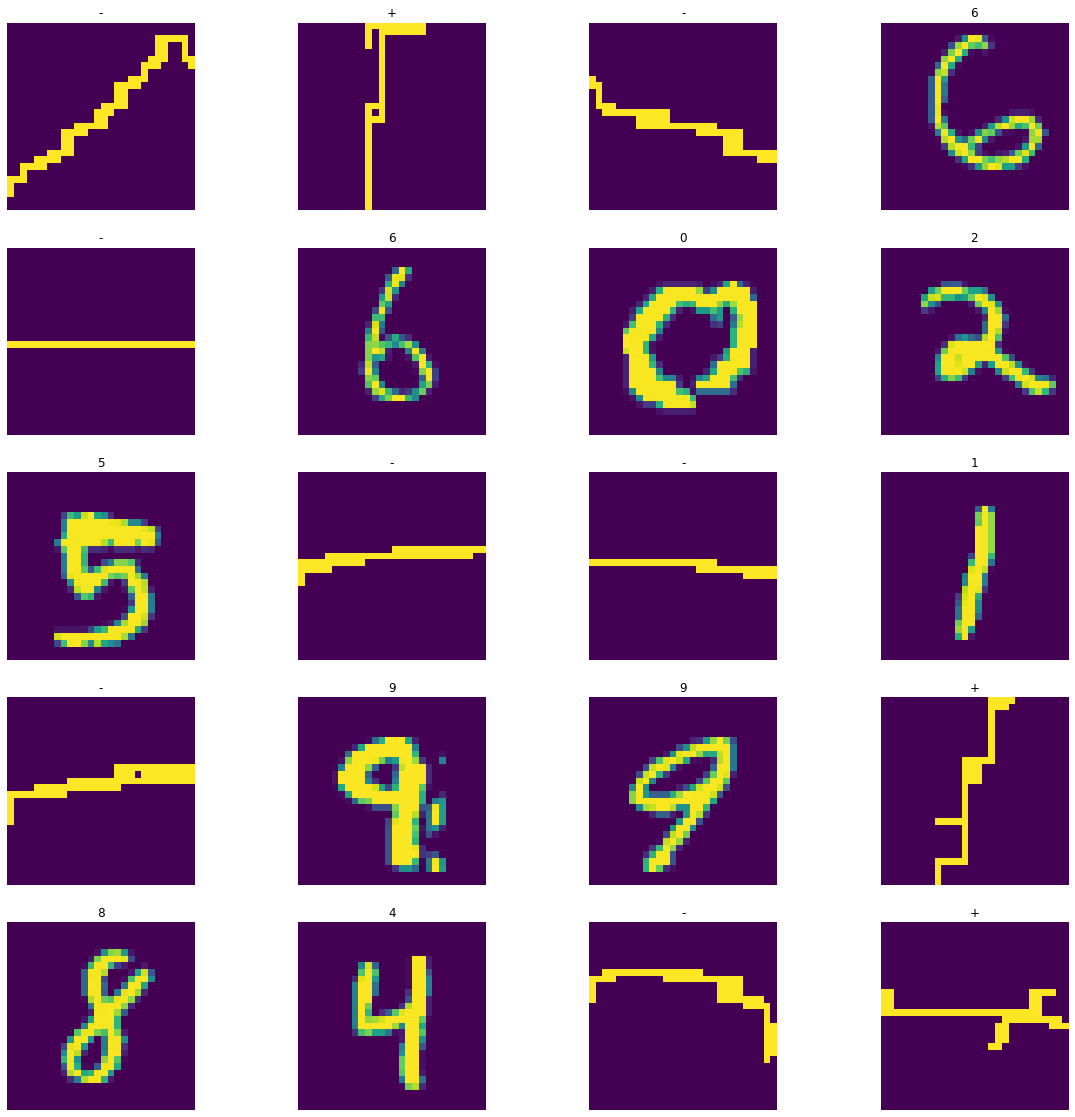

In [16]:
def plot_image(x,y, index):
    image = plt.imshow(x[index])
#     print(y[index])
    l=plt.title(dic[y[index]])
    ax.grid(False)
    ax.axis('off')    
    return image, l
fig = plt.figure(figsize=(20, 20))

for i in range(20):
    ax = fig.add_subplot(5, 4, i + 1)
    plot_image(X_shuffled,y_shuffled, i)

plt.show()

In [17]:
import keras
y_categorical = keras.utils.to_categorical(y_shuffled, 14)

In [18]:
y_categorical

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_shuffled,y_categorical,test_size=0.1)

In [20]:
len(x_train),len(y_train)


(77138, 77138)

In [21]:
len(x_test),len(y_test)


(8571, 8571)

In [22]:
import numpy as np

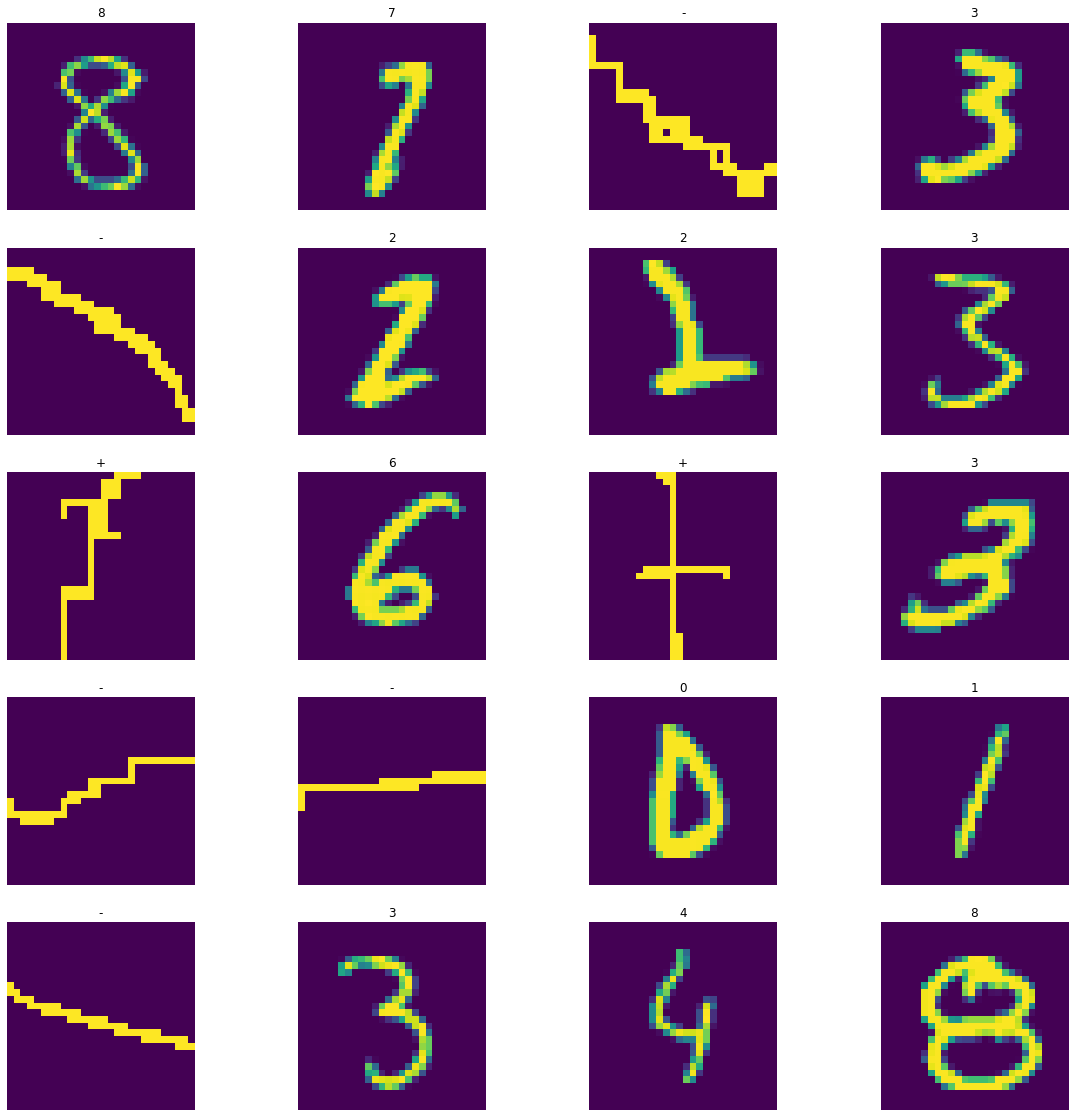

In [23]:
def plot_image(x,y, index):
    image = plt.imshow(x[index])
#     print(y[index])
    l=plt.title(dic[np.argmax(y[index])])
    ax.grid(False)
    ax.axis('off')    
    return image, l
fig = plt.figure(figsize=(20, 20))

for i in range(20,40):
    ax = fig.add_subplot(5, 4, i + 1-20)
    plot_image(x_train,y_train, i)

plt.show()

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from tensorflow import keras

In [25]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = "Same", activation = "relu", input_shape = (28, 28, 1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = "Same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "Same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "Same", activation = "relu"))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "Same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(14, activation = "softmax"))

optimizer = RMSprop(lr = 0.001, rho = 0.9, epsilon = 1e-08, decay=0.0 )

model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])


In [26]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

stop = EarlyStopping(
    monitor='val_accuracy', 
    mode='max',
    patience=6
)

checkpoint= ModelCheckpoint(
    filepath='./',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

learning_rate_reduction = ReduceLROnPlateau(monitor = "val_accuracy",
                                            patience = 3,
                                            verbose = 1,
                                            factor = 0.5,
                                            min_lr = 0.0001)

In [27]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
        featurewise_center=False,  
        samplewise_center=False,
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False, 
        zca_whitening=False,  
        rotation_range=10, 
        zoom_range = 0.1, 
        width_shift_range=0.1, 
        height_shift_range=0.1, 
        horizontal_flip=False,  
        vertical_flip=False,
validation_split=0.1) 

In [28]:
epochs = 10
batch_size = 256

In [29]:
train_generator = datagen.flow(
    x_train,
    y_train,
    batch_size=batch_size,
    subset='training')

In [30]:
validation_generator = datagen.flow(
     x_train,
    y_train,
    batch_size=batch_size,
    subset='validation') 

In [31]:
train_generator.__len__()

272

In [32]:
history = model.fit_generator(train_generator,
                                epochs = epochs, 
                                verbose = 1, 
                                steps_per_epoch=(x_train.shape[0]*0.9) // batch_size, 
                              validation_data = validation_generator,
                                callbacks=[learning_rate_reduction,stop,checkpoint]                            
                              )


c:\users\lenovo\anaconda3\envs\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
271/271 [==============================] - 232s 850ms/step - loss: 0.9762 - accuracy: 0.6979 - val_loss: 0.1076 - val_accuracy: 0.9663
Epoch 2/10
271/271 [==============================] - 234s 862ms/step - loss: 0.1292 - accuracy: 0.9620 - val_loss: 0.0595 - val_accuracy: 0.9811
Epoch 3/10
271/271 [==============================] - 236s 871ms/step - loss: 0.0800 - accuracy: 0.9755 - val_loss: 0.0469 - val_accuracy: 0.9860
Epoch 4/10
271/271 [==============================] - 233s 860ms/step - loss: 0.0610 - accuracy: 0.9808 - val_loss: 0.0428 - val_accuracy: 0.9859
Epoch 5/10
271/271 [==============================] - 232s 857ms/step - loss: 0.0555 - accuracy: 0.9833 - val_loss: 0.0420 - val_accuracy: 0.9869
Epoch 6/10
271/271 [==============================] - 233s 858ms/step - loss: 0.0448 - accuracy: 0.9870 - val_loss: 0.0317 - val_accuracy: 0.9900
Epoch 7/10
271/271 [==============================] - 199s 732ms/step - loss: 0.0413 - accuracy: 0.9872 - val_loss: 0.0296 -

In [33]:
model.save("model_scratch2.h5")

In [34]:
model_scratch=keras.models.load_model("model_scratch2.h5")

In [35]:
x_test_array=np.array(x_test)
x_test_scaled=x_test_array/255.0

In [36]:
x_test_scaled=x_test_scaled.reshape(-1,28,28,1)

In [37]:
x_test_scaled.shape

(8571, 28, 28, 1)

In [38]:
y_test_array=np.array(y_test)

In [39]:

loss, acc = model_scratch.evaluate(x_test_scaled, y_test_array)
print('Accuracy: ', acc, '\nLoss    : ', loss)

268/268 [==============================] - 3s 12ms/step - loss: 0.0218 - accuracy: 0.9936
Accuracy:  0.9935830235481262 
Loss    :  0.021759837865829468


In [40]:
# history=model_scratch.history

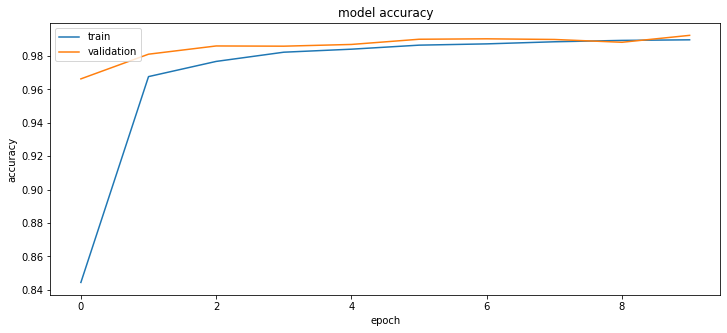

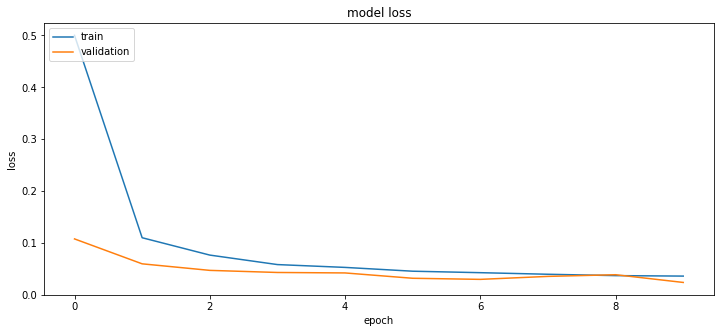

In [41]:
plt.figure(figsize=(12, 5))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.figure(figsize=(12, 5))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [42]:
pred = np.argmax(model.predict(x_test_scaled), axis = 1)
pred

array([11,  6, 12, ..., 12, 11, 11], dtype=int64)

In [43]:
actual=np.argmax(y_test_array, axis = 1)

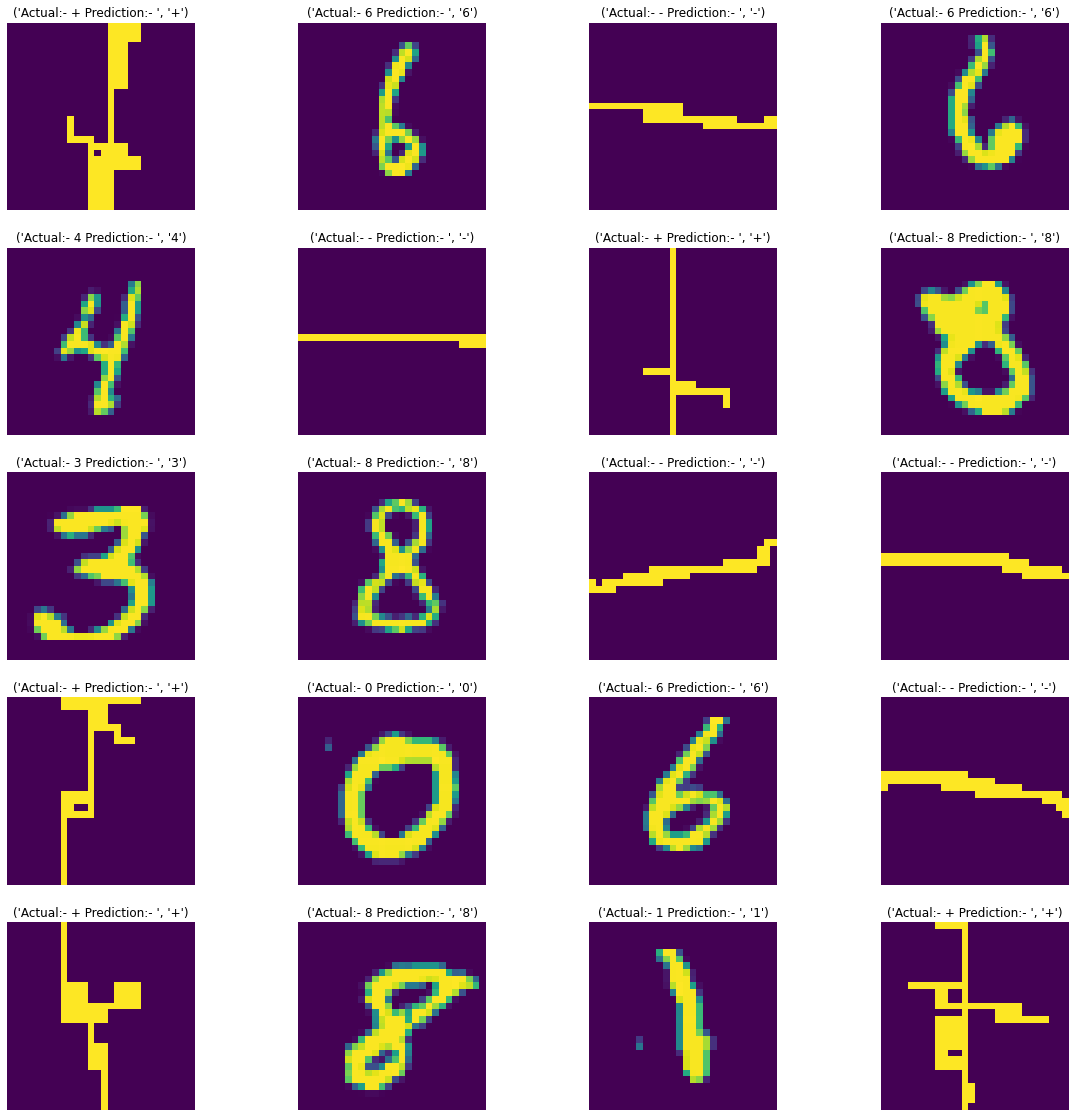

In [44]:
def plot_image(x_test,pred,actual, i,dic):
    image = plt.imshow(x_test[i])
    title="Actual:- "+str(dic[actual[i]])+" Prediction:- ",str(dic[pred[i]])
    l=plt.title(title)
    ax.grid(False)
    ax.axis('off')    
    return image, l
fig = plt.figure(figsize=(20, 20))

for i in range(20):
    ax = fig.add_subplot(5, 4, i + 1)
    plot_image(x_test,pred,actual, i,dic)

plt.show()

In [45]:
from sklearn.metrics import confusion_matrix, classification_report
labels = [str(dic[i]) for i in range(14)]
print(classification_report(actual, pred, target_names = labels))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       465
           1       1.00      0.98      0.99       466
           2       0.99      1.00      0.99       413
           3       0.99      0.99      0.99       429
           4       0.99      0.99      0.99       379
           5       1.00      0.97      0.99       395
           6       0.98      1.00      0.99       408
           7       0.99      1.00      0.99       445
           8       0.99      0.98      0.98       402
           9       0.98      1.00      0.99       429
           /       1.00      1.00      1.00         5
           +       0.99      1.00      1.00      2196
           -       1.00      1.00      1.00      2129
           *       1.00      0.90      0.95        10

    accuracy                           0.99      8571
   macro avg       0.99      0.99      0.99      8571
weighted avg       0.99      0.99      0.99      8571



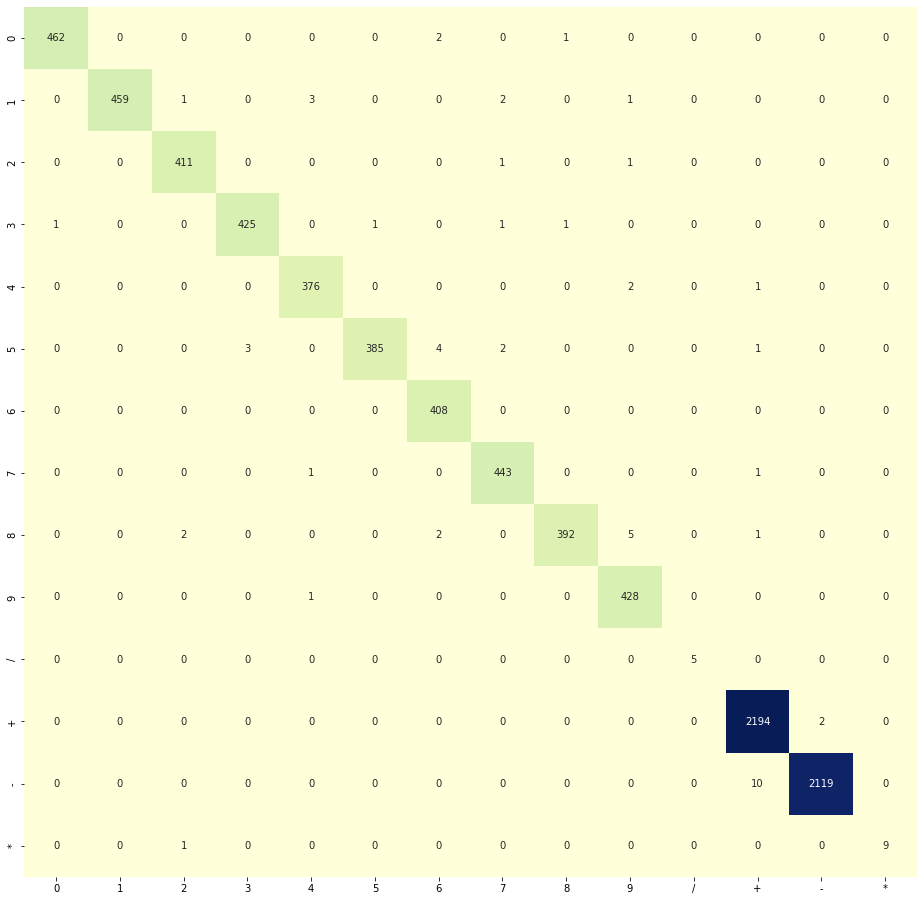

In [46]:
import seaborn as sns
cmat = confusion_matrix(actual, pred)
plt.figure(figsize=(16,16))
sns.heatmap(cmat, annot = True, cbar = False, cmap='YlGnBu', fmt="d", xticklabels=labels, yticklabels=labels);